In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%alias_magic t timeit -p"-n1000"

Created `%t` as an alias for `%timeit -n1000`.
Created `%%t` as an alias for `%%timeit -n1000`.


# Summing

In [3]:
M = 10_000

Full np ftw

In [4]:
%%t
y = np.sum(np.arange(M))

16.2 µs ± 1.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%%t
y = sum(range(M))

131 µs ± 7.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%%t
y = 0
for x in range(M):
    y += x

414 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Mixing np and built-in functions seems a bad idea

In [7]:
%%t
y = np.sum(list(range(M)))

772 µs ± 47.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
%%t
y = np.sum(range(M))

1.1 ms ± 35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Random

### Comparing list of random walks generated one by one or as a matrix

In [9]:
def random_walk(n=1000):
    """returns a RW as an array of length l"""
    return np.cumsum(np.append(np.zeros(1), np.random.choice([-1, 1], n - 1)))

In [10]:
def random_walk_array(n=100, l=1000):
    """returns an (n, l)-array of n random walks of length l"""
    return np.cumsum(np.append(np.zeros((n, 1)), np.random.choice([-1, 1], (n, l-1)), axis=1), axis=1)

In [11]:
walk_len = 100
n_walks = 10000

Matrix-like generation allows a ~50x speed-up

In [12]:
%%timeit -n10
last_values = []
for i in range(n_walks):
    walk = random_walk(walk_len)
    last_values.append(walk[-1])

423 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit -n100
walks = random_walk_array(n_walks, walk_len)
last_values = walks[:, -1]

12.4 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Plotting

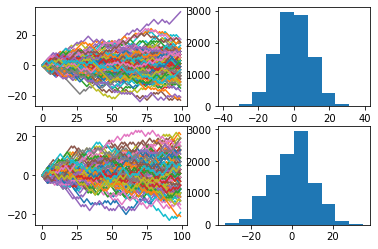

In [20]:
fig, axs = plt.subplots(2, 2)
max_plotted_lines = 100  # can get very slow without cap

# seq
last_values = []
c = 0
for i in range(n_walks):
    walk = random_walk(walk_len)
    if c < max_plotted_lines:
        axs[0, 0].plot(np.arange(walk_len), walk)
        c += 1
    last_values.append(walk[-1])
axs[0, 1].hist(last_values)

# matrix
walks = random_walk_array(n_walks, walk_len)
last_values = walks[:, -1]
axs[1, 1].hist(last_values)
for i in range(min(walks.shape[0], max_plotted_lines)):
    axs[1, 0].plot(np.arange(walk_len), walks[i, :])

# Concat

In [18]:
%%timeit -n10000
np.concatenate([np.zeros((10, 2)), np.ones((10, 3))], axis=1)

4.69 µs ± 772 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit -n10000
np.append(np.zeros((10, 2)), np.ones((10, 3)), axis=1)

5.46 µs ± 548 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
